# Trajectory analysis

In [384]:
import scanpy as sc
import cellestial as cl
from lets_plot import *

LetsPlot.setup_html()

In [385]:
adata = sc.read("data/processed/AMC_subset_annotated.h5ad")

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/anndata/compat/__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [386]:
adata.obs["celltype"] = adata.obs["celltype"].astype(str).astype("category")

#### Note seurat object to h5ad did not retain celltype info

In [387]:
adata.obs["celltype"].unique()

['3', '1', '0', '2']
Categories (4, object): ['0', '1', '2', '3']

### Plot with Cellestial

In [388]:
cl.umap(adata, "celltype", size=2, axis_type="arrow", legend_ondata="True")

### Assingn cell types

In [389]:
cluster = {
    "0": "Proliferating sympathoblasts",  # = "MKI67",
    "1": "Sympathoblasts",  # = c("ELAVL4", "ISL1", "PRPH"),
    "2": "SCPs",  # = c("SOX10","PLP1"),
    "3": "Chromaffin cells",  # = c("CHGA","PNMT")
}
adata.obs["cell_type"] = adata.obs["celltype"].map(cluster)
adata.obs["cell_type"].unique()

['Chromaffin cells', 'Sympathoblasts', 'Proliferating sympathoblasts', 'SCPs']
Categories (4, object): ['Proliferating sympathoblasts', 'Sympathoblasts', 'SCPs', 'Chromaffin cells']

In [390]:
cl.umaps(
    adata,
    ["celltype", "cell_type"],
    size=2,
    axis_type="arrow",
    legend_ondata="True",
    ncol=2,
)

## Overall Dataset

### PAGA

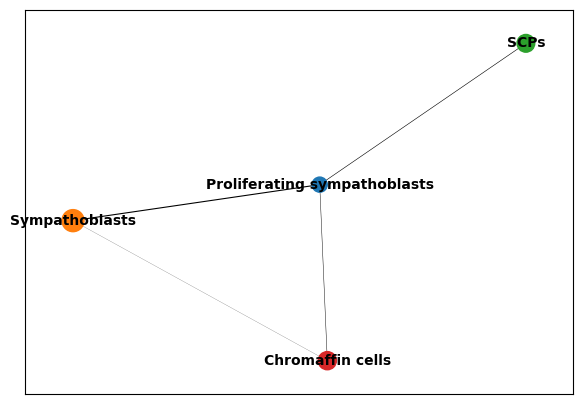

In [391]:
sc.tl.paga(adata, groups="cell_type")
sc.pl.paga(adata, color="cell_type")

### Re calculate Neigbors and UMAP

In [392]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)

In [393]:
sc.tl.umap(adata, init_pos="paga")
umap_all =cl.umap(
    adata, key="cell_type", legend_ondata=True, axis_type="arrow", ondata_size=8, size=3
) + ggtitle("All AMC cells")
umap_all

In [394]:
print(adata.obs["cell_type"].unique())

['Chromaffin cells', 'Sympathoblasts', 'Proliferating sympathoblasts', 'SCPs']
Categories (4, object): ['Proliferating sympathoblasts', 'Sympathoblasts', 'SCPs', 'Chromaffin cells']


### Run DPT

In [395]:
root_cell = adata.obs[adata.obs["cell_type"] == "SCPs"].index[0]
adata.uns["iroot"] = adata.obs.index.get_loc(root_cell)
sc.tl.dpt(adata)

In [396]:
umap_all_dpt =(
    cl.umap(
        adata,
        key="dpt_pseudotime",
        size=3,
        axis_type="arrow",
        add_tooltips=["cell_type"],
    )
    + scale_color_viridis()
    + ggtitle("All AMC cells")
    + ggsize(600, 500)
)
umap_all_dpt

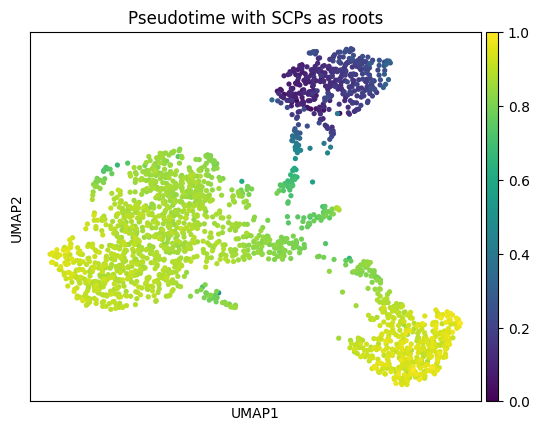

In [397]:
sc.pl.umap(adata, color="dpt_pseudotime", title="Pseudotime with SCPs as roots")

In [398]:
(
    cl.umap(
        adata,
        key="dpt_pseudotime",
        size=2,
        axis_type="arrow",
        add_tooltips=["cell_type"],
    )
    + scale_color_viridis()
)

### Heatmap

In [399]:
sc.tl.rank_genes_groups(adata, 'cell_type', method='t-test')

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


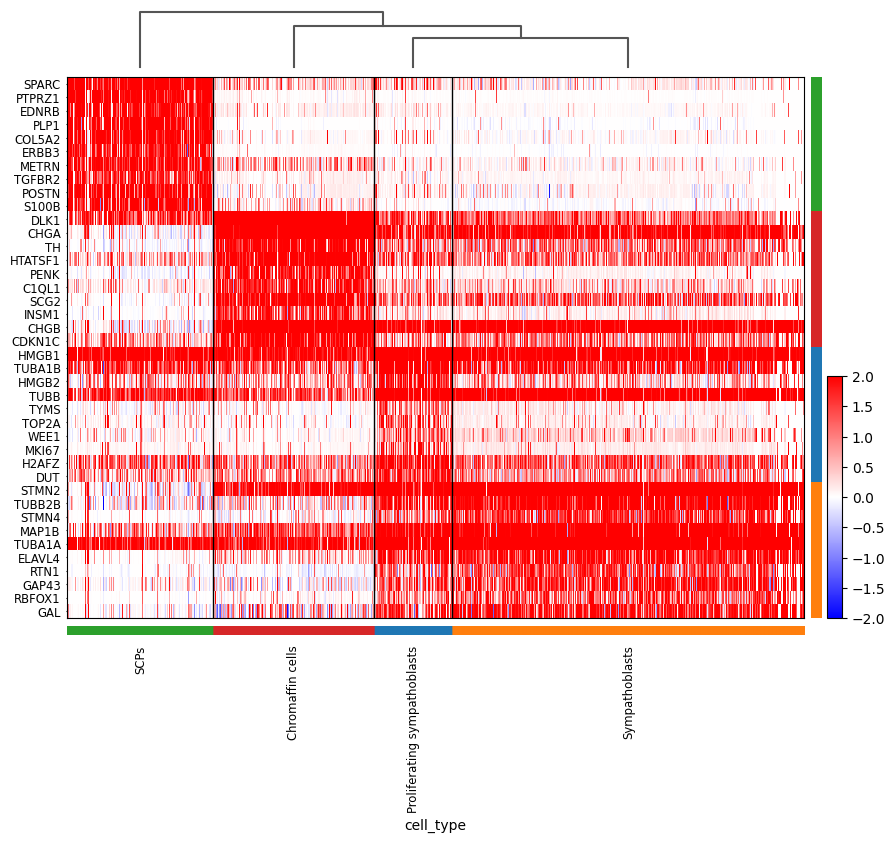

In [400]:
sc.pl.rank_genes_groups_heatmap(
    adata,
    n_genes=10,  # show top 10 per group
    groupby='cell_type',
    show_gene_labels=True,
    cmap='bwr',
    swap_axes=True,
    vmin=-2, vmax=2  # 
)

## Subsets

1. SCPs to Sympathoblasts
2. SCPs to Chromaffin Cells
3. Chromaffin Cells to Sympathoblasts

subset1

In [401]:
subset1 = ["Proliferating sympathoblasts", "Sympathoblasts", "SCPs"]
adata1 = adata[adata.obs["cell_type"].isin(subset1)]

subset2

In [402]:
subset2 = ["Chromaffin cells", "SCPs","Proliferating sympathoblasts"]
adata2 = adata[adata.obs["cell_type"].isin(subset2)]

subset3

In [403]:
subset3 = ["Chromaffin cells", "Proliferating sympathoblasts", "Sympathoblasts"]
adata3 = adata[adata.obs["cell_type"].isin(subset3)]

### SCPs to sympathoblasts

In [404]:
adata1.obs["cell_type"].unique()

['Sympathoblasts', 'Proliferating sympathoblasts', 'SCPs']
Categories (3, object): ['Proliferating sympathoblasts', 'Sympathoblasts', 'SCPs']

#### PAGA workflow

In [405]:
sc.tl.paga(adata1, groups="cell_type")

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_paga.py:139: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[groups + "_sizes"] = np.array(paga.ns)


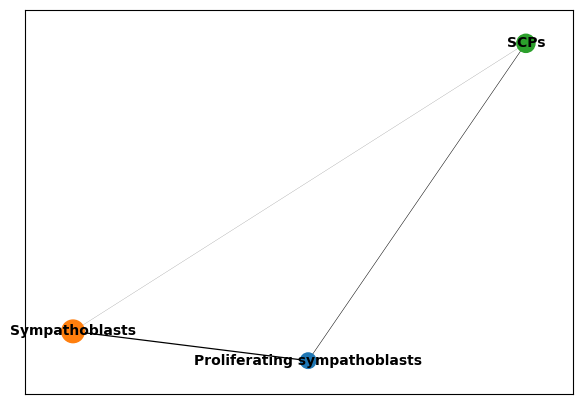

In [406]:
sc.pl.paga(adata1, color='cell_type')

In [407]:
sc.pp.neighbors(adata1, n_neighbors=15, n_pcs=40)

In [408]:
sc.tl.umap(adata1, init_pos="paga")

In [409]:
umap1 =(
    cl.umap(
        adata1,
        key="cell_type",
        legend_ondata=True,
        axis_type="arrow",
        ondata_size=8,
        size=3,
    )
    + ggtitle("SCPs and sympathoblasts")
    + ggsize(600, 500)
)
umap1

#### Run DPT

In [410]:
root_cell = adata1.obs[adata1.obs["cell_type"] == "SCPs"].index[0]
adata1.uns["iroot"] = adata1.obs.index.get_loc(root_cell)
sc.tl.dpt(adata1)

In [411]:
umap1_dpt =(
    cl.umap(
        adata1,
        key="dpt_pseudotime",
        size=3,
        axis_type="arrow",
        add_tooltips=["cell_type"],
    )
    + scale_color_viridis()
    + ggtitle("SCPs and sympathoblasts ")
    + ggsize(600, 500)
)
umap1_dpt

#### Find changing genes along the trajectory

In [412]:
sc.tl.rank_genes_groups(adata1, 'cell_type', method='t-test')

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [413]:
top_genes = adata1.uns['rank_genes_groups']['names']
top_genes[:10]

rec.array([('HMGB2', 'STMN2', 'SPARC'), ('HMGN2', 'MIAT', 'PTPRZ1'),
           ('TUBA1B', 'CD24', 'EDNRB'), ('HMGB1', 'CHGB', 'PLP1'),
           ('TYMS', 'DBH', 'COL5A2'), ('DUT', 'HAND2-AS1', 'METRN'),
           ('TOP2A', 'TUBB2B', 'ERBB3'), ('MKI67', 'RGS5', 'TGFBR2'),
           ('HELLS', 'GATA2', 'S100B'), ('CENPF', 'PCSK1N', 'POSTN')],
          dtype=[('Proliferating sympathoblasts', 'O'), ('Sympathoblasts', 'O'), ('SCPs', 'O')])

#### Heatmap of genes chaning along the trajectory

In [414]:
sc.tl.dendrogram(adata1, groupby="cell_type")

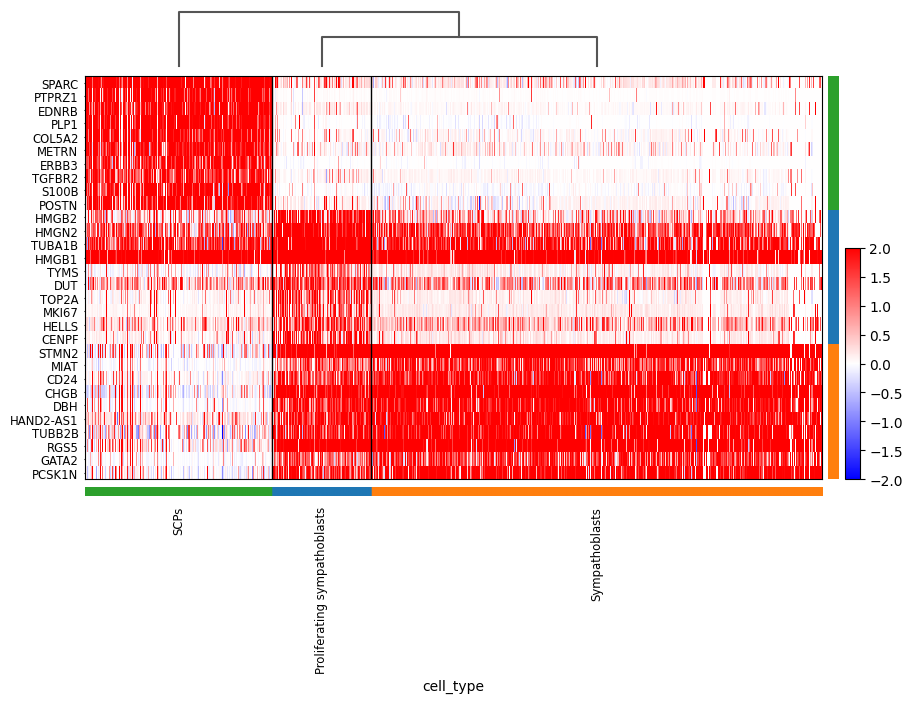

In [415]:
heatmap1 = sc.pl.rank_genes_groups_heatmap(
    adata1,
    n_genes=10,
    groupby='cell_type',
    show_gene_labels=True,
    cmap='bwr',
    swap_axes=True,
    save='_scps_and_sympathoblasts.pdf',
    vmin=-2, vmax=2)
heatmap1

### SCPs to Chromaffin Cells

In [416]:
adata2.obs["cell_type"].unique()

['Chromaffin cells', 'Proliferating sympathoblasts', 'SCPs']
Categories (3, object): ['Proliferating sympathoblasts', 'SCPs', 'Chromaffin cells']

#### PAGA

In [417]:
sc.tl.paga(adata2, groups="cell_type")

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_paga.py:139: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[groups + "_sizes"] = np.array(paga.ns)


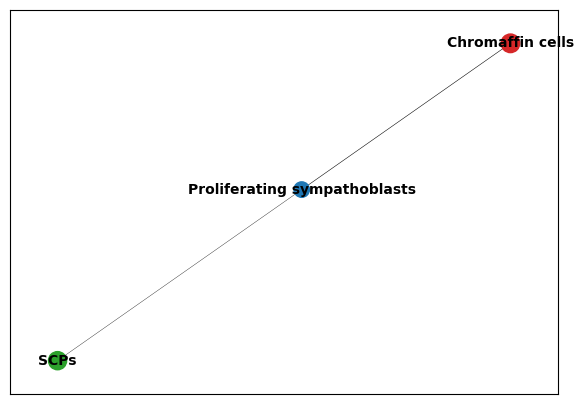

In [418]:
sc.pl.paga(adata2, color='cell_type')

In [419]:
sc.pp.neighbors(adata2, n_neighbors=15, n_pcs=40)

In [420]:
sc.tl.umap(adata2, init_pos="paga")

In [421]:
umap2 =(
    cl.umap(
        adata2,
        key="cell_type",
        legend_ondata=True,
        axis_type="arrow",
        ondata_size=8,
        size=3,
    )
    + ggtitle("SCPs and Chromaffin Cells")
    + ggsize(600, 500)
)
umap2

#### Run DPT

In [422]:
root_cell = adata2.obs[adata2.obs["cell_type"] == "SCPs"].index[0]
adata2.uns["iroot"] = adata2.obs.index.get_loc(root_cell)
sc.tl.dpt(adata2)

In [423]:
umap2_dpt =(
    cl.umap(
        adata2,
        key="dpt_pseudotime",
        size=3,
        axis_type="arrow",
        add_tooltips=["cell_type"],
    )
    + scale_color_viridis()
    + ggtitle("SCPs and Chromaffin Cells")
    + ggsize(600, 500)
)
umap2_dpt

#### Find changing genes along the trajectory

In [424]:
sc.tl.rank_genes_groups(adata2, 'cell_type', method='t-test')

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [425]:
top_genes = adata2.uns['rank_genes_groups']['names']
top_genes[:10]

rec.array([('TUBB', 'PTPRZ1', 'CHGA'), ('MAP1B', 'PLP1', 'DLK1'),
           ('STMN1', 'SPARC', 'TH'), ('TUBB2B', 'COL5A2', 'CHGB'),
           ('STMN2', 'EDNRB', 'SCG2'), ('HMGB1', 'ANXA2', 'HTATSF1'),
           ('ELAVL4', 'ERBB3', 'RGS4'), ('BASP1', 'TGFBR2', 'RAMP1'),
           ('KIF21A', 'MPZ', 'SLC18A1'), ('TUBA1B', 'OLFML2A', 'PENK')],
          dtype=[('Proliferating sympathoblasts', 'O'), ('SCPs', 'O'), ('Chromaffin cells', 'O')])

#### Heatmap of genes chaning along the trajectory

In [426]:
sc.tl.dendrogram(adata2, groupby="cell_type")

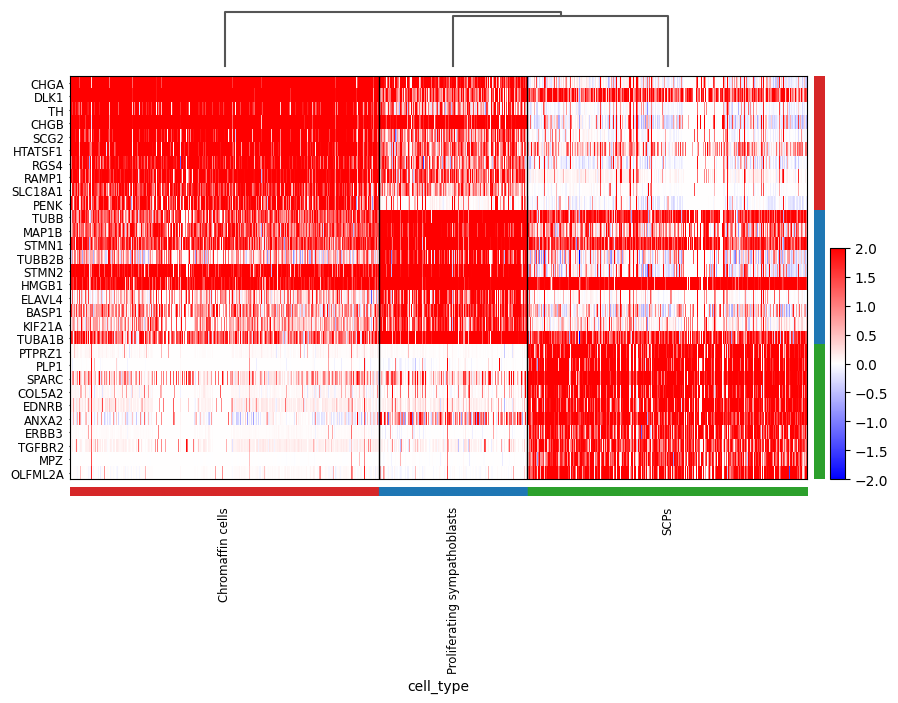

In [427]:
heatmap2 = sc.pl.rank_genes_groups_heatmap(
    adata2,
    n_genes=10,
    groupby='cell_type',
    show_gene_labels=True,
    cmap='bwr',
    swap_axes=True,
    save='_scps_and_chromaffin.pdf',
    vmin=-2, vmax=2)

heatmap2

### Chromaffin Cells to Sympathoblasts

In [428]:
adata3.obs["cell_type"].unique()

['Chromaffin cells', 'Sympathoblasts', 'Proliferating sympathoblasts']
Categories (3, object): ['Proliferating sympathoblasts', 'Sympathoblasts', 'Chromaffin cells']

#### PAGA

In [429]:
sc.tl.paga(adata3, groups="cell_type")

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_paga.py:139: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[groups + "_sizes"] = np.array(paga.ns)


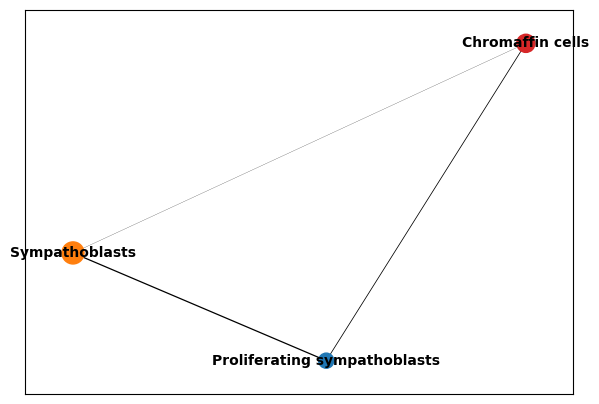

In [430]:
sc.pl.paga(adata3, color="cell_type")

In [431]:
sc.pp.neighbors(adata3, n_neighbors=15, n_pcs=40)

In [432]:
sc.tl.umap(adata3, init_pos="paga")

In [433]:
umap3 = (
    cl.umap(
        adata3,
        key="cell_type",
        legend_ondata=True,
        axis_type="arrow",
        ondata_size=8,
        size=3,
    )
    + ggtitle("Chromaffin Cells and Sympathoblasts")
    + ggsize(600, 500)
)

#### Run DPT

In [434]:
root_cell = adata3.obs[adata3.obs["cell_type"] == "Sympathoblasts"].index[0]
adata3.uns["iroot"] = adata3.obs.index.get_loc(root_cell)
sc.tl.dpt(adata3)

In [435]:
umap3_dpt = (
    cl.umap(
        adata3,
        key="dpt_pseudotime",
        size=3,
        axis_type="arrow",
        add_tooltips=["cell_type"],
    )
    + scale_color_viridis()
    + ggtitle("Chromaffin Cells and Sympathoblasts")
    + ggsize(600, 500)
)
umap3_dpt

#### Find changing genes along the trajectory

In [436]:
sc.tl.rank_genes_groups(adata3, 'cell_type', method='t-test')

/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/Users/zaf4/dev/CCRItask/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:484: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


In [437]:
top_genes = adata3.uns['rank_genes_groups']['names']
top_genes[:10]

rec.array([('HMGB1', 'SOX4', 'DLK1'), ('TUBA1B', 'STMN2', 'CHGA'),
           ('HMGB2', 'TUBB2B', 'PENK'), ('TOP2A', 'TUBA1A', 'C1QL1'),
           ('TYMS', 'STMN4', 'HTATSF1'), ('MKI67', 'RTN1', 'INSM1'),
           ('CDK1', 'MAP1B', 'TH'), ('CENPF', 'GAP43', 'SLC24A2'),
           ('H2AFZ', 'RBFOX1', 'CDKN1C'), ('TUBB', 'PHOX2B', 'ST18')],
          dtype=[('Proliferating sympathoblasts', 'O'), ('Sympathoblasts', 'O'), ('Chromaffin cells', 'O')])

#### Heatmap of genes chaning along the trajectory

In [438]:
sc.tl.dendrogram(adata3, groupby="cell_type")

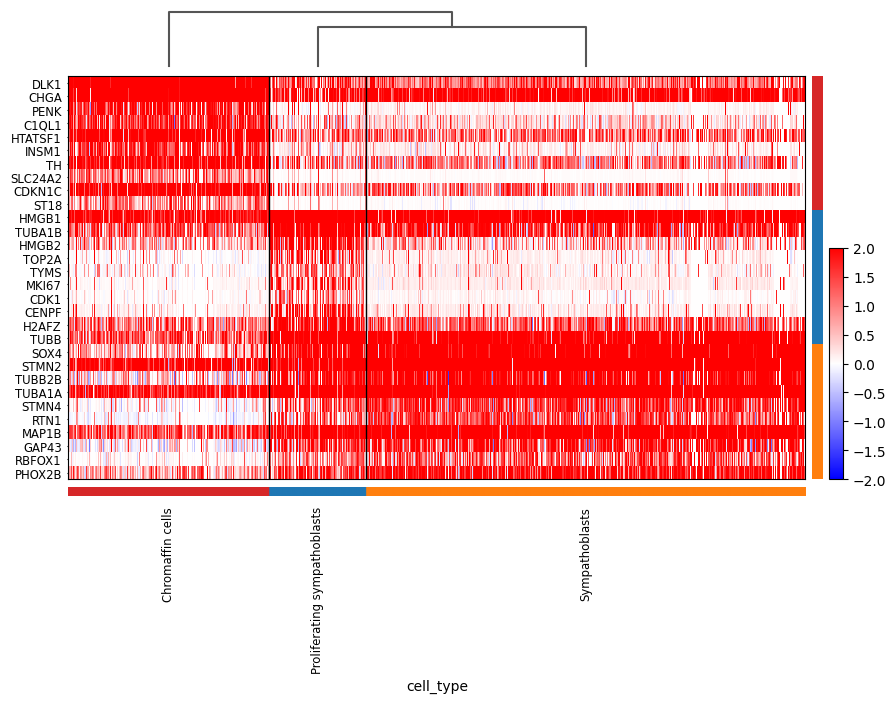

In [439]:
heatmap3 = sc.pl.rank_genes_groups_heatmap(
    adata3,
    n_genes=10,
    groupby='cell_type',
    show_gene_labels=True,
    cmap='bwr',
    swap_axes=True,
    save='_chromaffin_and_sympathoblasts.pdf',
    vmin=-2, vmax=2,return_fig=True)
heatmap3

In [442]:
grid = gggrid([umap_all, umap_all_dpt, umap1, umap1_dpt, umap2, umap2_dpt, umap3, umap3_dpt], ncol=2) + ggsize(800,1200)
grid

In [441]:
ggsave(grid, filename='plots/umap_pseudotime.svg', path='.')

'/Users/zaf4/dev/CCRItask/plots/umap_pseudotime.svg'